<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# K-Means is an exmaple of hard clustering where every point is part of only one cluster

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [54]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [55]:
print(X.shape)

(500, 2)


In [56]:
# Not really needed because K-Means is unsupervised Learning
np.unique(y)

array([0, 1, 2, 3, 4])

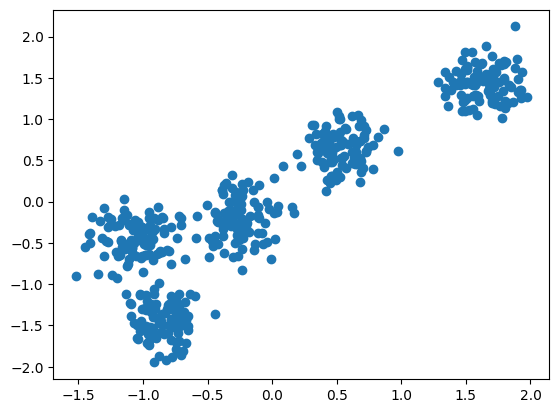

In [57]:
# Data Visualise
def normalise(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)
  return (X-u)/std

X = normalise(X)

plt.scatter(X[:,0],X[:,1])
plt.show()

In [58]:
# Init the K-centers for K-clusters

k = 5
colors = ["green","red","blue","yellow","orange"]
n_features = 2

def init(k):
  centroids = {}

  for i in range(k):

    center = 2*(2*np.random.random((n_features,)) -1 )
    centroids[i] = {
        'center' : center,
        'color' : colors[i],
        'points' : []
    }
    print(center)

#  print(centroids)
  return centroids


centroids = init(k)

[-0.50451608  1.180964  ]
[-1.61980514  0.77633494]
[1.67104835 0.95223527]
[0.87437335 0.63979086]
[-0.91515695  0.41540746]


In [59]:
# Step 2a

def distance(p,q):
  return np.sqrt(np.sum((p-q)**2))

def assignPtsToCluster(X,centroids):
  m = X.shape[0]
  # Each point will be assigned to exactly one of the clusters

  for i in range(m):
    cdist = []
    cx = X[i]

    # find out distance of points from each centroid
    for kx in range(k):
      d = distance(centroids[kx]['center'],cx)
      cdist.append(d)

    clusterId = np.argmin(cdist)

    # Assign the point to the list of points that current_cluster holds
    centroids[clusterId]['points'].append(cx)



In [60]:
assignPtsToCluster(X,centroids)
#centroids

In [61]:
# Step 2b
def updateClusters(centroids):

  # Update every centroid by taking a mean of points assigned to the cluster
  for kx in range(k):
    pts = np.array(centroids[kx]['points'])

    # If a cluster has non-zero points
    if pts.shape[0] > 0:
      newCenter = pts.mean(axis=0)
      centroids[kx]['center'] = newCenter
      centroids[kx]['points'] = [] #Clear the list for step 2a




In [62]:
def plotClusters(centroids):

  for kx in range(k):
    pts = np.array(centroids[kx]['points'])

    #plot the points
    if(pts.shape[0]>0):
      plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])

    #plot the Cluster center (Centroid)
    uk = centroids[kx]['center']
    plt.scatter(uk[0],uk[1],color='black',marker='*')

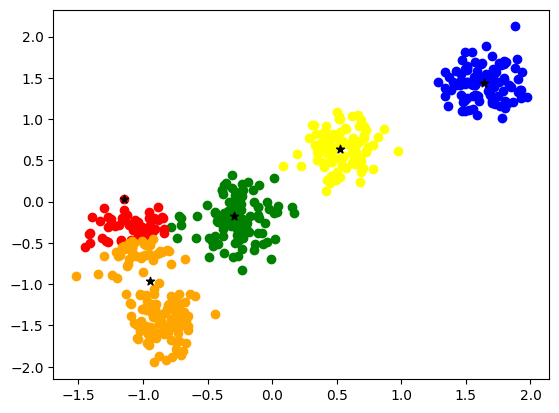

In [67]:
assignPtsToCluster(X,centroids)
plotClusters(centroids)
updateClusters(centroids)